In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [2]:
# importing LGBM function
from lightgbm import LGBMRegressor

In [3]:
# loading in data
df = pd.read_csv("train.csv")

# dropping necessary columns to avoid data leakage
df = df.dropna()
df['spread'] = df['ask_price'] - df['bid_price']
features_df = df[['bid_size', 'ask_size','imbalance_size','matched_size']]

In [4]:
# isolating numerical values
num_vals = df[['bid_size', 'ask_size','imbalance_size','matched_size','reference_price']]

In [6]:
# creating test-train split
X = features_df

# created response variable array
y = num_vals["reference_price"]

X_tr, X_tst, y_tr, y_tst = train_test_split(X, y, test_size=0.2)

In [7]:
# creating model with fit
lgbmod = LGBMRegressor()
lgbmod.fit(X_tr,y_tr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1874910, number of used features: 4
[LightGBM] [Info] Start training from score 0.999980


LGBMRegressor()

In [8]:
# evaluating accuracy of model
accuracy = lgbmod.score(X_tst, y_tst)
print(accuracy)

0.01060773249182767


In [9]:
y_hat = lgbmod.predict(X_tst)

Text(0.5, 1.0, 'LightGDB Predicted Reference Price vs Actual')

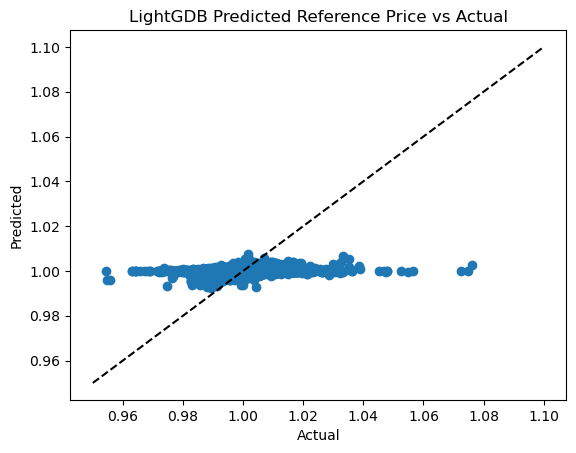

In [13]:
plt.plot(y_tst, y_hat, linestyle="None", marker = "o")
plt.plot(np.linspace(0.95,1.1, 10), np.linspace(0.95,1.1, 10), 
         color = "black", linestyle = "--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LightGDB Predicted Reference Price vs Actual")

In [14]:
# rmse with removed features
rmse_subset = np.sqrt(mean_squared_error(y_tst, y_hat))
print(rmse_subset)

0.003061955041471681


In [16]:
pearsonr(y_hat,y_tst)[0]

0.10841155041906543